# Flair Classification


In [6]:
# from EDA import *
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
%matplotlib inline


In [7]:
hot_top_new_posts = pd.read_csv('data_new.csv')

In [8]:
hot_top_new_posts

,title,score,num_comments,comments,flair,title_clean,comments_clean,body_clean,title+comments,title+body,title+comments+body,title+comments+body+url,url_clean
0,Two Police Security Guards and Official Driver...,1,0,[],Coronavirus,two police security guards official driver bjp...,NaN,NaN,two police security guards official driver bjp...,two police security guards official driver bjp...,two police security guards official driver bjp...,two police security guards official driver bjp...,https www news18 com news india two police sec...
1,Plasma Therapy for COVID19 affected patients w...,3,1,['Person to write is article is even worse tha...,Coronavirus,plasma therapy covid19 affected patients works...,person write article even worse english,NaN,plasma therapy covid19 affected patients works...,plasma therapy covid19 affected patients works...,plasma therapy covid19 affected patients works...,plasma therapy covid19 affected patients works...,https www thebigmirror com plasma therapy coro...
2,Coronavirus: Bengal Admits 57 COVID-19 Patient...,4,0,[],Coronavirus,coronavirus bengal admits 57 covid 19 patients...,NaN,NaN,coronavirus bengal admits 57 covid 19 patients...,coronavirus bengal admits 57 covid 19 patients...,coronavirus bengal admits 57 covid 19 patients...,coronavirus bengal admits 57 covid 19 patients...,https www ndtv com india news coronavirus beng...
3,WB govt intentionally hiding COVID-19 cases,4,2,['WB is pulling an Italy. Shameful and stupid ...,Coronavirus,wb govt intentionally hiding covid 19 cases,wb pulling italy shameful stupid considering e...,NaN,wb govt intentionally hiding covid 19 cases wb...,wb govt intentionally hiding covid 19 cases,wb govt intentionally hiding covid 19 cases wb...,wb govt intentionally hiding covid 19 cases wb...,https redd 53q4f0pfotu41 jpg
4,Covid-19 lockdown: Centre takes a giant leap i...,9,0,[],Coronavirus,covid 19 lockdown centre takes giant leap midn...,NaN,NaN,covid 19 lockdown centre takes giant leap midn...,covid 19 lockdown centre takes giant leap midn...,covid 19 lockdown centre takes giant leap midn...,covid 19 lockdown centre takes giant leap midn...,https hindustantimes com india news covid 19 l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,"AMA request : Anil Bokil, the man who gave Nar...",132,53,[deleted] [deleted] isn't that idea as old as...,AMA,ama request anil bokil man gave narendra modi ...,deleted deleted idea old world war talks going...,anil bokil http www livemint com politics ik4l...,ama request anil bokil man gave narendra modi ...,ama request anil bokil man gave narendra modi ...,ama request anil bokil man gave narendra modi ...,ama request anil bokil man gave narendra modi ...,https www reddit com r india comments 5e28la a...
2638,I played golf today to officially mark my entr...,29,24,"Stop making me feel insecure, petty and jealo...",AMA,played golf today officially mark entry high s...,stop making feel insecure petty jealous idea t...,hit drives given tips former asian tour player...,played golf today officially mark entry high s...,played golf today officially mark entry high s...,played golf today officially mark entry high s...,played golf today officially mark entry high s...,https www reddit com r india comments 71yenl i...
2639,"Hi /r/India, Rahul here. AMA,",204,270,If rahul is in a forest and nobody is around ...,AMA,hi r india rahul ama,rahul forest nobody around hear still talk wom...,taking break taking break day kill dare say sk...,hi r india rahul ama rahul forest nobody aroun...,hi r india rahul ama taking break taking break...,hi r india rahul ama rahul forest nobody aroun...,hi r india rahul ama rahul forest nobody aroun...,https www reddit com r india comments 310cuw h...
2640,"AMA: I am Vinit Masram, an independent filmmak...",66,73,What advice would you give to people(amateur:...,AMA,ama vinit masram independent filmmaker youtuber,advice would give people amateur filmmaker wri...,quick bio name vinit masram independe

### Preparing data to be fed into the model

In [9]:
hot_top_new_posts = hot_top_new_posts.drop(columns = ['num_comments','score','comments'])
#'body','url','subreddit','created','id',
hot_top_new_posts.reset_index(drop=True, inplace=True)

In [10]:
hot_top_new_posts['title+comments+body+url'].loc[4]

'covid 19 lockdown centre takes giant leap midnight order lets local shops open today india news np   https hindustantimes com india news covid 19 lockdown centre takes giant leap midnight order lets local shops open today story z5nedy2nkuyghfd2mtlqjm html'

In [11]:
hnp = hot_top_new_posts.copy(deep=True)
hnp.reset_index(drop=True, inplace=True)


In [12]:
rmv_indices = []
hnp = hnp.fillna('')
for i in range(hnp.shape[0]):
    if hnp.flair.loc[i] == '':
        rmv_indices.append(i)
        
hnp = hnp.drop(hnp.index[rmv_indices])

    

In [13]:
hnp.flair.unique()

array(['Coronavirus', 'Sports', 'Non-Political', 'Food', 'AskIndia',
       'Science/Technology', 'Business/Finance', 'Politics', 'Policies',
       'CAA-NRC', 'Photography', '[R]eddiquette', 'Entertainment', 'AMA'],
      dtype=object)

In [14]:
hnp = hnp[hnp.flair != '[R]eddiquette']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hnp['title+comments+body+url'], hnp.flair, test_size=0.1, random_state = 42)

[Text(0.5, 1.0, 'Flair v/s their count')]

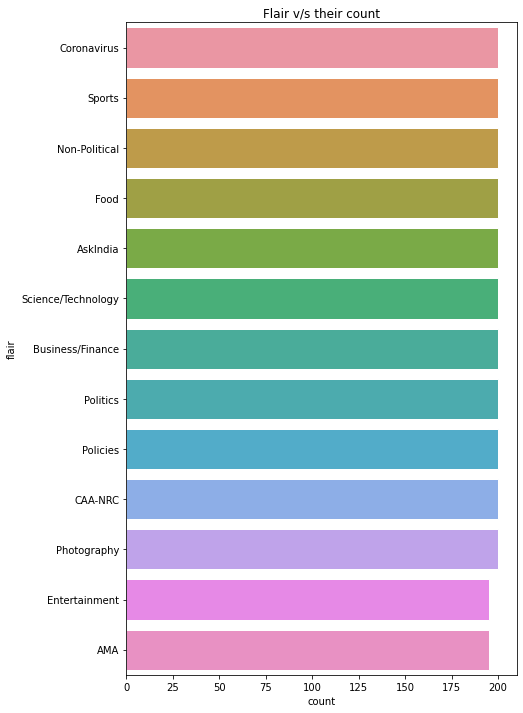

In [16]:
fig_dims = (7, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
sns.countplot(y="flair",ax=ax,data=hnp).set(title = "Flair v/s their count")

### The classes seem well balanced now, and hence ready to be fed in

In [17]:
len(hot_top_new_posts[hot_top_new_posts['flair']=='Food'])

200

In [18]:
# ##encoding each class in column flair
# num = LabelEncoder()
# hnp['flair'] = num.fit_transform(hnp['flair'].astype(str))
# hnp.head()


In [19]:
X_train = X_train.fillna('')
y_train = y_train.fillna('')

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

rmv_indices = []
for i in range(y_train.shape[0]):
    if y_train[i] == '':
        rmv_indices.append(i)
        print(i)

In [20]:
y_train = y_train.drop(y_train.index[rmv_indices])
X_train = X_train.drop(X_train.index[rmv_indices])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [21]:
print(len(y_train.unique()))

13


In [22]:
([print(flr) for flr in hnp.flair.unique()])


Coronavirus
Sports
Non-Political
Food
AskIndia
Science/Technology
Business/Finance
Politics
Policies
CAA-NRC
Photography
Entertainment
AMA


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [78]:
flairz = [f for f in hnp.flair.unique()]

In [79]:
assert len(flairz)==len(y_train.unique())

### Method 1: Random Forests

As we noticed in the EDA section, the data was a bit skewed and not equally distributed.In such conditions, Random Forest works well,hence starting by that method.


In [82]:
def Random_Forest(X_train,X_test,y_train,y_test):
    rfc = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', RandomForestClassifier(n_estimators = 1000, random_state = 42,n_jobs=5,class_weight = "balanced")),
                  ])
    RM = rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    with open('model/random_forest_69.pkl','wb') as file:
        pickle.dump(rfc, file)
    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=flairz))
    print_confusion_matrix(y_pred)


def print_confusion_matrix(y_pred):
    data = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

    

accuracy 0.6911196911196911
                    precision    recall  f1-score   support

       Coronavirus       0.72      0.95      0.82        19
            Sports       0.58      0.75      0.65        20
     Non-Political       0.94      0.57      0.71        30
              Food       0.71      0.88      0.79        17
          AskIndia       0.48      0.71      0.57        17
Science/Technology       0.74      0.78      0.76        18
  Business/Finance       0.62      0.62      0.62        16
          Politics       0.30      0.32      0.31        19
          Policies       0.76      0.88      0.81        25
           CAA-NRC       0.79      0.55      0.65        20
       Photography       0.57      0.47      0.52        17
     Entertainment       0.94      0.73      0.82        22
               AMA       1.00      0.79      0.88        19

          accuracy                           0.69       259
         macro avg       0.70      0.69      0.69       259
      weig

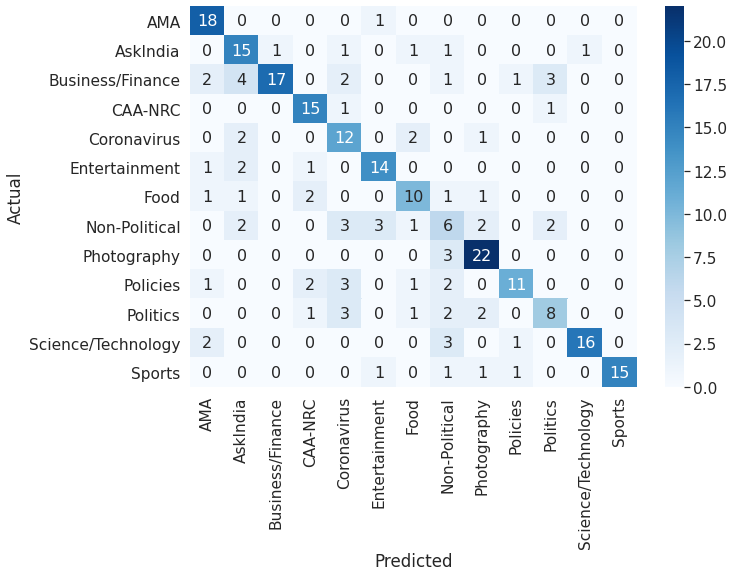

In [83]:
Random_Forest(X_train,X_test,y_train,y_test)


## Method 2: Naive Bayes

In [84]:
def NaiveBayes(X_train,X_test,y_train,y_test):
    data_gen = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
    data_gen.fit(X_train, y_train)
    y_pred = data_gen.predict(X_test)
    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=flairz))
    print_confusion_matrix(y_pred)

def print_confusion_matrix(y_pred):
    data = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
        

accuracy 0.5444015444015444
                    precision    recall  f1-score   support

       Coronavirus       0.24      1.00      0.39        19
            Sports       0.60      0.30      0.40        20
     Non-Political       0.80      0.27      0.40        30
              Food       0.78      0.82      0.80        17
          AskIndia       0.75      0.53      0.62        17
Science/Technology       0.57      0.44      0.50        18
  Business/Finance       0.56      0.62      0.59        16
          Politics       0.00      0.00      0.00        19
          Policies       0.90      0.76      0.83        25
           CAA-NRC       0.38      0.75      0.51        20
       Photography       0.77      0.59      0.67        17
     Entertainment       0.92      0.55      0.69        22
               AMA       0.92      0.58      0.71        19

          accuracy                           0.54       259
         macro avg       0.63      0.55      0.55       259
      weig

/home/anton/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


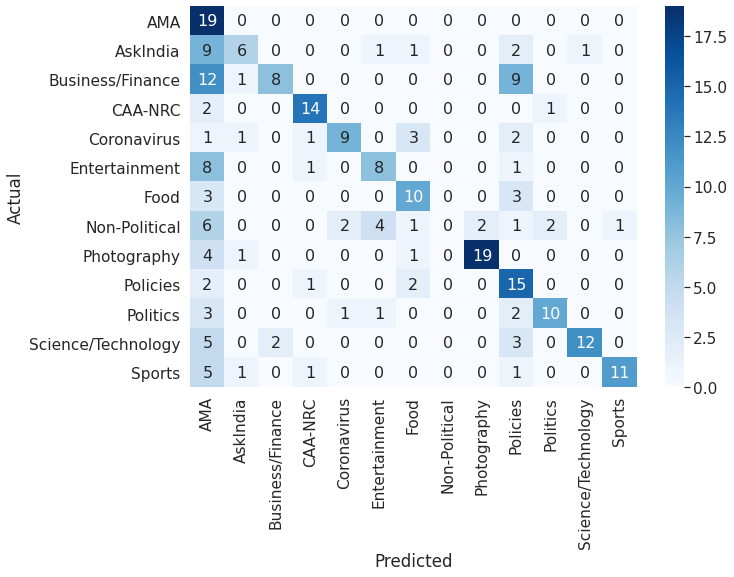

In [85]:
NaiveBayes(X_train,X_test,y_train,y_test)

In [86]:
#                  TODO:

#### Check accuracy when new data is added

### add advantages/disadvantages of every model

####check for time taken to run the block


## SVM

In [87]:
'''
    checkout this alternative svm implementation as well
    https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

'''

'\n    checkout this alternative svm implementation as well\n    https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html\n\n'

In [106]:
# SVM = svm.SVC()
# X_train = vectorizer.fit_transform(X_train)

# SVM.fit(X_train, y_train)
# SVM.predict(vectorizer.transform(["Who else remember the Beyblade tazos spinners come with lays & cheetos back in 2000's?"]).toarray())

# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=flairz))




def linear_svm(X_train, X_test, y_train, y_test):
    sgd = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
                 ])
    sgd.fit(X_train, y_train)

    y_pred = sgd.predict(X_test)
    with open('model/svm_71.pkl','wb') as file:
        pickle.dump(sgd, file)
    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=flairz))
    print_confusion_matrix(y_pred)

def print_confusion_matrix(y_pred):
    data = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

accuracy 0.7104247104247104
                    precision    recall  f1-score   support

       Coronavirus       0.79      1.00      0.88        19
            Sports       0.77      0.50      0.61        20
     Non-Political       0.85      0.57      0.68        30
              Food       0.67      0.94      0.78        17
          AskIndia       0.69      0.65      0.67        17
Science/Technology       0.60      0.83      0.70        18
  Business/Finance       0.57      1.00      0.73        16
          Politics       0.57      0.21      0.31        19
          Policies       0.73      0.88      0.80        25
           CAA-NRC       0.57      0.40      0.47        20
       Photography       0.69      0.65      0.67        17
     Entertainment       0.81      0.77      0.79        22
               AMA       0.86      0.95      0.90        19

          accuracy                           0.71       259
         macro avg       0.71      0.72      0.69       259
      weig

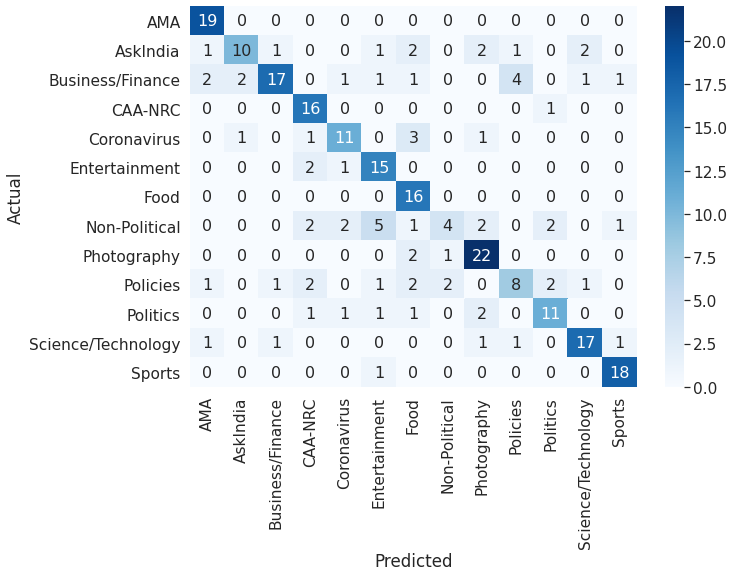

In [107]:
linear_svm(X_train, X_test, y_train, y_test)

## Logistic Regression


In [108]:
def Logistic_Regression(X_train, X_test, y_train, y_test):
    log_reg = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(n_jobs=5, C=1e5)),  ##set number of jobs accd to cpu
                   ])
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    with open('model/log_regression.pkl','wb') as file:
        pickle.dump(log_reg, file)
    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=flairz))
    print_comfusion_matrix(y_pred)

def print_comfusion_matrix(y_pred):
    data = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

accuracy 0.7065637065637066
                    precision    recall  f1-score   support

       Coronavirus       0.78      0.95      0.86        19
            Sports       0.57      0.60      0.59        20
     Non-Political       0.81      0.57      0.67        30
              Food       1.00      0.82      0.90        17
          AskIndia       0.65      0.76      0.70        17
Science/Technology       0.62      0.83      0.71        18
  Business/Finance       0.62      0.81      0.70        16
          Politics       0.35      0.37      0.36        19
          Policies       0.95      0.76      0.84        25
           CAA-NRC       0.62      0.50      0.56        20
       Photography       0.57      0.71      0.63        17
     Entertainment       0.77      0.77      0.77        22
               AMA       1.00      0.84      0.91        19

          accuracy                           0.71       259
         macro avg       0.72      0.72      0.71       259
      weig

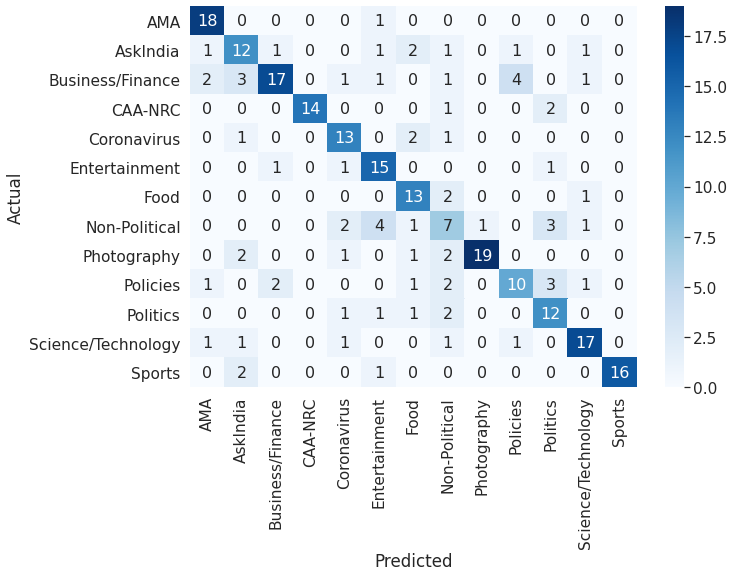

In [109]:
Logistic_Regression(X_train, X_test, y_train, y_test)

In [92]:
# BOW

In [110]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [111]:
train_size = int(len(hot_top_new_posts) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(hot_top_new_posts) - train_size))

Train size: 1849
Test size: 793


In [112]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [113]:
hot_top_new_posts

,title,flair,title_clean,comments_clean,body_clean,title+comments,title+body,title+comments+body,title+comments+body+url,url_clean
0,Two Police Security Guards and Official Driver...,Coronavirus,two police security guards official driver bjp...,NaN,NaN,two police security guards official driver bjp...,two police security guards official driver bjp...,two police security guards official driver bjp...,two police security guards official driver bjp...,https www news18 com news india two police sec...
1,Plasma Therapy for COVID19 affected patients w...,Coronavirus,plasma therapy covid19 affected patients works...,person write article even worse english,NaN,plasma therapy covid19 affected patients works...,plasma therapy covid19 affected patients works...,plasma therapy covid19 affected patients works...,plasma therapy covid19 affected patients works...,https www thebigmirror com plasma therapy coro...
2,Coronavirus: Bengal Admits 57 COVID-19 Patient...,Coronavirus,coronavirus bengal admits 57 covid 19 patients...,NaN,NaN,coronavirus bengal admits 57 covid 19 patients...,coronavirus bengal admits 57 covid 19 patients...,coronavirus bengal admits 57 covid 19 patients...,coronavirus bengal admits 57 covid 19 patients...,https www ndtv com india news coronavirus beng...
3,WB govt intentionally hiding COVID-19 cases,Coronavirus,wb govt intentionally hiding covid 19 cases,wb pulling italy shameful stupid considering e...,NaN,wb govt intentionally hiding covid 19 cases wb...,wb govt intentionally hiding covid 19 cases,wb govt intentionally hiding covid 19 cases wb...,wb govt intentionally hiding covid 19 cases wb...,https redd 53q4f0pfotu41 jpg
4,Covid-19 lockdown: Centre takes a giant leap i...,Coronavirus,covid 19 lockdown centre takes giant leap midn...,NaN,NaN,covid 19 lockdown centre takes giant leap midn...,covid 19 lockdown centre takes giant leap midn...,covid 19 lockdown centre takes giant leap midn...,covid 19 lockdown centre takes giant leap midn...,https hindustantimes com india news covid 19 l...
...,...,...,...,...,...,...,...,...,...,...
2637,"AMA request : Anil Bokil, the man who gave Nar...",AMA,ama request anil bokil man gave narendra modi ...,deleted deleted idea old world war talks going...,anil bokil http www livemint com politics ik4l...,ama request anil bokil man gave narendra modi ...,ama request anil bokil man gave narendra modi ...,ama request anil bokil man gave narendra modi ...,ama request anil bokil man gave narendra modi ...,https www reddit com r india comments 5e28la a...
2638,I played golf today to officially mark my entr...,AMA,played golf today officially mark entry high s...,stop making feel insecure petty jealous idea t...,hit drives given tips former asian tour player...,played golf today officially mark entry high s...,played golf today officially mark entry high s...,played golf today officially mark entry high s...,played golf today officially mark entry high s...,https www reddit com r india comments 71yenl i...
2639,"Hi /r/India, Rahul here. AMA,",AMA,hi r india rahul ama,rahul forest nobody around hear still talk wom...,taking break taking break day kill dare say sk...,hi r india rahul ama rahul forest nobody aroun...,hi r india rahul ama taking break taking break...,hi r india rahul ama rahul forest nobody aroun...,hi r india rahul ama rahul forest nobody aroun...,https www reddit com r india comments 310cuw h...
2640,"AMA: I am Vinit Masram, an independent filmmak...",AMA,ama vinit masram independent filmmaker youtuber,advice would give people amateur filmmaker wri...,quick bio name vinit masram independent filmma...,ama vinit masram independent filmmaker youtube...,ama vinit masram independent filmmaker youtube...,ama vinit masram independent filmmaker youtube...,ama vinit masram independent filmmaker youtube...,https www reddit com r india comments 5kxe1v a...


In [114]:
assert len(y_train.unique())== len(y_test.unique())

In [98]:
tokenize.fit_on_texts(X_train) # only fit on train
x_train_tok = tokenize.texts_to_matrix(X_train)
x_test_tok = tokenize.texts_to_matrix(X_test)

In [99]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [100]:
y_train

0                   Sports
1       Science/Technology
2       Science/Technology
3       Science/Technology
4                 Policies
               ...        
2326              Policies
2327    Science/Technology
2328    Science/Technology
2329      Business/Finance
2330              AskIndia
Name: flair, Length: 2331, dtype: object

In [101]:
num_classes = np.max(y_train_encoded) + 1
y_train_encoded = utils.to_categorical(y_train_encoded, num_classes)
y_test_encoded = utils.to_categorical(y_test_encoded, num_classes)

In [102]:
batch_size = 128
epochs = 15

In [103]:


# Build the model
model = Sequential()
model.add(Dense(1024, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',])



In [116]:
history = model.fit(x_train_tok, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)



Train on 1631 samples, validate on 700 samples
Epoch 1/15
1631/1631 [==============================] - 0s 154us/step - loss: 0.0782 - accuracy: 0.9890 - val_loss: 0.4420 - val_accuracy: 0.8914
Epoch 2/15
1631/1631 [==============================] - 0s 151us/step - loss: 0.0708 - accuracy: 0.9933 - val_loss: 0.4352 - val_accuracy: 0.8886
Epoch 3/15
1631/1631 [==============================] - 0s 149us/step - loss: 0.0623 - accuracy: 0.9914 - val_loss: 0.4403 - val_accuracy: 0.8886
Epoch 4/15
1631/1631 [==============================] - 0s 146us/step - loss: 0.0580 - accuracy: 0.9957 - val_loss: 0.4573 - val_accuracy: 0.8871
Epoch 5/15
1631/1631 [==============================] - 0s 148us/step - loss: 0.0501 - accuracy: 0.9957 - val_loss: 0.4682 - val_accuracy: 0.8871
Epoch 6/15
1631/1631 [==============================] - 0s 156us/step - loss: 0.0444 - accuracy: 0.9969 - val_loss: 0.4599 - val_accuracy: 0.8857
Epoch 7/15
1631/1631 [==============================] - 0s 156us/step - loss:

In [117]:


score = model.evaluate(x_test_tok, y_test_encoded,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])



259/259 [==============================] - 0s 34us/step
Test accuracy: 0.6409266591072083
